# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 13: Data Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Numerosity Data Reduction
## Random sampling
### Example – Random sampling to speed up tuning

In [2]:
customer_df = pd.read_csv('Customer Churn.csv')
customer_df

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0
...,...,...,...,...,...,...,...,...,...
3145,21,0,19,6697,147,92,44,1,0
3146,17,0,17,9237,177,80,42,1,0
3147,13,0,18,3157,51,38,21,1,0
3148,7,0,11,4695,46,222,12,1,0


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

param_grid = {
      'criterion':['gini','entropy'],
      'max_depth': [10,20,30,40,50,60],
      'min_samples_split': [10,20,30,40,50],
      'min_impurity_decrease': [0,0.001,
                    0.005, 0.01, 0.05, 0.1]}

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv=3, 
                          scoring='recall',verbose=1)
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score:  0.7353535353535353
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 40}


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:   10.6s finished


In [4]:
customer_df_rs = customer_df.sample(1000,random_state=1)
y=customer_df_rs['Churn']
Xs = customer_df_rs.drop(columns=['Churn'])

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv=3, 
                          scoring='recall',verbose=1)
gridSearch.fit(Xs, y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Initial score:  0.7430555555555555
Initial parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    5.3s finished


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

classTree = DecisionTreeClassifier(criterion= 'entropy', 
                                   max_depth= 10,
                                   min_samples_split= 10,
                                   min_impurity_decrease= 
                                   0.005)
classTree.fit(Xs, y)

dot_data = export_graphviz(classTree, 
                           out_file=None, 
                           feature_names=Xs.columns,  
                           class_names=['Not Churn',
                                        'Churn'], 
                           filled=True,
                           rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render(filename='ChurnDT')

'ChurnDT.pdf'

In [6]:
customer_df.Churn.value_counts(normalize=True)

0    0.842857
1    0.157143
Name: Churn, dtype: float64

In [7]:
for i in range(3):
    print(customer_df.sample(1000).Churn.value_counts(normalize=True))

0    0.851
1    0.149
Name: Churn, dtype: float64
0    0.849
1    0.151
Name: Churn, dtype: float64
0    0.841
1    0.159
Name: Churn, dtype: float64


## Stratified sampling
### Example – Stratified sampling for imbalanced dataset

In [8]:
n,s=len(customer_df),1000
r = s/n
sample_df = customer_df.groupby('Churn', group_keys=False).apply(lambda sdf: sdf.sample(round(len(sdf)*r)))
print(sample_df.Churn.value_counts(normalize=True))

0    0.843
1    0.157
Name: Churn, dtype: float64


<AxesSubplot:>

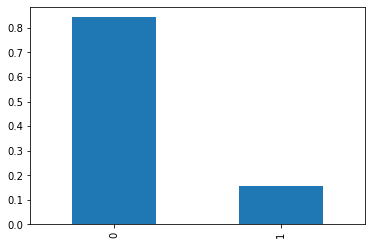

In [9]:
customer_df.Churn.value_counts(normalize=True).plot.bar()

## Random Over/Under-sampling

In [10]:
n,s=len(customer_df),500
sample_df = customer_df.groupby('Churn', group_keys=False) .apply(lambda sdf: sdf.sample(250))
print(sample_df.Churn.value_counts(normalize=True))

1    0.5
0    0.5
Name: Churn, dtype: float64


# Dimensionality Data Reduction
## Linear Regression as a dimension reduction method 
### Example – Dimension Reduction using Linear Regression

In [11]:
amzn_df = pd.read_csv('amznStock.csv')
amzn_df.set_index('t',drop=True,inplace=True)
amzn_df.columns = ['pd_changeP', 'pw_changeP', 'dow_pd_changeP',
       'dow_pw_changeP', 'nasdaq_pd_changeP', 'nasdaq_pw_changeP',
       'changeP']
amzn_df

,pd_changeP,pw_changeP,dow_pd_changeP,dow_pw_changeP,nasdaq_pd_changeP,nasdaq_pw_changeP,changeP
t,,,,,,,
2019-08-23,-1.035349,-1.078743,0.188949,-0.105289,-0.333497,-0.268107,-3.049884
2019-08-26,-3.049884,-0.756680,-2.374425,0.586671,-3.145535,-0.335637,1.100239
2019-08-27,1.100239,-0.408193,1.053224,1.248816,1.473944,1.204158,-0.397996
2019-08-28,-0.397996,-1.714856,-0.466931,-0.417636,-0.118683,-0.500783,0.137360
2019-08-29,0.137360,-2.856089,1.001630,-0.381429,0.289057,-1.702481,1.255492
...,...,...,...,...,...,...,...
2021-01-06,1.000434,1.043553,0.554889,0.868805,0.848544,1.179472,-2.489665
2021-01-07,-2.489665,-1.081419,1.440532,2.084550,-1.398414,-0.689640,0.757717
2021-01-08,0.757717,-3.708938,0.686781,2.095648,2.505046,0.784415,0.649557


In [12]:
import statsmodels.api as sm

Xs = amzn_df.drop(columns=['changeP'],
                  index =['2021-01-12'] )
Xs = sm.add_constant(Xs)

y = amzn_df.drop(index =['2021-01-12']).changeP

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                changeP   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.678
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00149
Time:                        18:40:27   Log-Likelihood:                -750.72
No. Observations:                 349   AIC:                             1515.
Df Residuals:                     342   BIC:                             1542.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2342      0.122      1.926      0.055      -0.005       0.473
pd_changeP           -0.0804      0.112     -0.719      0.473      -0.300       0.140
pw_changeP            0.0665      0.044      1.499      0.135      -0.021       0.154
dow_pd_changeP       -0.2888      0.151     -1.914      0.056      -0.586       0.008
dow_pw_changeP        0.0866      0.066      1.316      0.189      -0.043       0.216
nasdaq_pd_changeP     0.0919      0.210      0.438      0.661      -0.321       0.505
nasdaq_pw_changeP    -0.1403      0.098     -1.433      0.153      -0.333       0.052
==============================================================================
Omnibus:                       25.863   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.802
Skew:                          -0.036   Prob(JB):                     5.79e-22
Kurtosis:                       5.592   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.linear_model import LinearRegression

Xs = amzn_df.drop(columns=['changeP'],
                  index =['2021-01-12'] )
y = amzn_df.drop(index =['2021-01-12']).changeP

lm = LinearRegression()
lm.fit(Xs, y)

print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2','b3','b4','b5','b6']
print(pd.DataFrame({'Predictor': Xs.columns,'coefficient Name':coef_names, 'coefficient Value': lm.coef_}))

intercept (b0)  0.23420844435994456
           Predictor coefficient Name  coefficient Value
0         pd_changeP               b1          -0.080374
1         pw_changeP               b2           0.066490
2     dow_pd_changeP               b3          -0.288781
3     dow_pw_changeP               b4           0.086627
4  nasdaq_pd_changeP               b5           0.091948
5  nasdaq_pw_changeP               b6          -0.140282


In [14]:
Xs = amzn_df.drop(index =['2021-01-12']).dow_pd_changeP
Xs = sm.add_constant(Xs)

y = amzn_df.drop(index =['2021-01-12']).changeP

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                changeP   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     19.40
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.42e-05
Time:                        18:40:27   Log-Likelihood:                -752.14
No. Observations:                 349   AIC:                             1508.
Df Residuals:                     347   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1975      0.112      1.761      0.079      -0.023       0.418
dow_pd_changeP    -0.2470      0.056     -4.404      0.000      -0.357      -0.137
==============================================================================
Omnibus:                       26.140   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.897
Skew:                          -0.037   Prob(JB):                     2.03e-22
Kurtosis:                       5.620   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Decision Tree as a dimension reduction method
## Random Forest as a Dimension Reduction method
### Example – Dimension Reduction using Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

y=customer_df['Churn']
Xs = customer_df.drop(columns=['Churn'])

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

In [16]:
rf.feature_importances_

array([0.07214171, 0.20186438, 0.12717646, 0.16176204, 0.13301979,
       0.07789608, 0.09393202, 0.13220752])

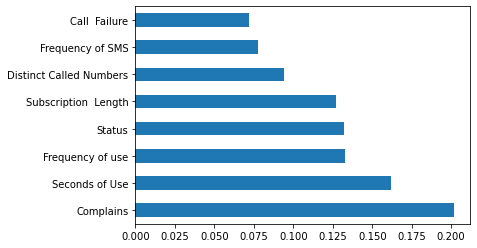

In [17]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()

## Brute-force Computational Dimension Reduction
### Example – finding the best subset of independent attributes for a classification algorithm 

In [18]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

in_atts = ['Call  Failure', 'Complains', 'Subscription  Length',
           'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 
           'Distinct Called Numbers', 'Status']
n_in_atts = len(in_atts)
result_df = pd.DataFrame(columns = ['subset_candidate','best_k',
                                    'performance'])
customer_df_std = (customer_df - customer_df.min())/(
    customer_df.max() - customer_df.min())

for n in range(1,n_in_atts+1):
    for atts in itertools.combinations(in_atts, r=n):
        atts = list(atts)
        Xs = customer_df_std[atts]
        y= customer_df['Churn']
        
        # Tune KNN
        param_grid = {
            'n_neighbors':[1,3,5,7]}
        gridSearch = GridSearchCV(KNeighborsClassifier(), 
                          param_grid, cv=2, scoring='recall')
        gridSearch.fit(Xs, y)
        best_k= gridSearch.best_params_['n_neighbors']
        
        # Train the tuned KNN
        knn = KNeighborsClassifier(best_k)
        knn.fit(Xs, y)
        
        # Prediction
        y_predict = knn.predict(Xs)
        
        # Performance evaluation
        dic_append = {'subset_candidate':atts, 'best_k': best_k,
                      'performance': recall_score(y,y_predict)}
        
        # Recording and Reporting
        result_df = result_df.append(dic_append, ignore_index=True)
        print(dic_append)

{'subset_candidate': ['Call  Failure'], 'best_k': 5, 'performance': 0.0}
{'subset_candidate': ['Complains'], 'best_k': 1, 'performance': 0.40404040404040403}
{'subset_candidate': ['Subscription  Length'], 'best_k': 1, 'performance': 0.23636363636363636}
{'subset_candidate': ['Seconds of Use'], 'best_k': 1, 'performance': 0.6565656565656566}
{'subset_candidate': ['Frequency of use'], 'best_k': 3, 'performance': 0.4404040404040404}
{'subset_candidate': ['Frequency of SMS'], 'best_k': 5, 'performance': 0.04242424242424243}
{'subset_candidate': ['Distinct Called Numbers'], 'best_k': 5, 'performance': 0.27474747474747474}
{'subset_candidate': ['Status'], 'best_k': 1, 'performance': 0.0}
{'subset_candidate': ['Call  Failure', 'Complains'], 'best_k': 7, 'performance': 0.39595959595959596}
{'subset_candidate': ['Call  Failure', 'Subscription  Length'], 'best_k': 1, 'performance': 0.4262626262626263}
{'subset_candidate': ['Call  Failure', 'Seconds of Use'], 'best_k': 1, 'performance': 0.7717171

{'subset_candidate': ['Subscription  Length', 'Seconds of Use', 'Frequency of use'], 'best_k': 1, 'performance': 0.9737373737373738}
{'subset_candidate': ['Subscription  Length', 'Seconds of Use', 'Frequency of SMS'], 'best_k': 1, 'performance': 0.9252525252525252}
{'subset_candidate': ['Subscription  Length', 'Seconds of Use', 'Distinct Called Numbers'], 'best_k': 1, 'performance': 0.9151515151515152}
{'subset_candidate': ['Subscription  Length', 'Seconds of Use', 'Status'], 'best_k': 7, 'performance': 0.6444444444444445}
{'subset_candidate': ['Subscription  Length', 'Frequency of use', 'Frequency of SMS'], 'best_k': 5, 'performance': 0.7131313131313132}
{'subset_candidate': ['Subscription  Length', 'Frequency of use', 'Distinct Called Numbers'], 'best_k': 1, 'performance': 0.9111111111111111}
{'subset_candidate': ['Subscription  Length', 'Frequency of use', 'Status'], 'best_k': 7, 'performance': 0.6404040404040404}
{'subset_candidate': ['Subscription  Length', 'Frequency of SMS', 'Di

{'subset_candidate': ['Complains', 'Subscription  Length', 'Frequency of use', 'Frequency of SMS'], 'best_k': 3, 'performance': 0.7535353535353535}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Frequency of use', 'Distinct Called Numbers'], 'best_k': 3, 'performance': 0.7111111111111111}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Frequency of use', 'Status'], 'best_k': 7, 'performance': 0.7333333333333333}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Frequency of SMS', 'Distinct Called Numbers'], 'best_k': 1, 'performance': 0.9515151515151515}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Frequency of SMS', 'Status'], 'best_k': 7, 'performance': 0.7111111111111111}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Distinct Called Numbers', 'Status'], 'best_k': 5, 'performance': 0.7575757575757576}
{'subset_candidate': ['Complains', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS'], 'best_k': 3, 'performance':

{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of SMS', 'Distinct Called Numbers'], 'best_k': 1, 'performance': 0.9575757575757575}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of SMS', 'Status'], 'best_k': 1, 'performance': 0.9555555555555556}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Distinct Called Numbers', 'Status'], 'best_k': 3, 'performance': 0.8444444444444444}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers'], 'best_k': 3, 'performance': 0.8141414141414142}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Frequency of use', 'Frequency of SMS', 'Status'], 'best_k': 5, 'performance': 0.8606060606060606}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Frequency of use', 'Distinct Called Numbers', 'Status'], 'best_k': 5, 'performance': 0.8202

{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Status'], 'best_k': 1, 'performance': 0.9555555555555556}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers', 'Status'], 'best_k': 5, 'performance': 0.8424242424242424}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of SMS', 'Distinct Called Numbers', 'Status'], 'best_k': 3, 'performance': 0.8565656565656565}
{'subset_candidate': ['Call  Failure', 'Subscription  Length', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Status'], 'best_k': 3, 'performance': 0.8565656565656565}
{'subset_candidate': ['Call  Failure', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Status'], 'best_k': 3, 'performance': 0.8464646464646465}
{'subset_candidate': ['Complains', 'Subscription  Length', 'Seconds of Use

In [19]:
result_df.sort_values('performance',ascending=False)

,subset_candidate,best_k,performance
138,"[Complains, Seconds of Use, Frequency of use, ...",1,0.995960
85,"[Seconds of Use, Frequency of SMS, Distinct Ca...",1,0.995960
209,"[Complains, Seconds of Use, Frequency of use, ...",1,0.987879
139,"[Complains, Seconds of Use, Frequency of use, ...",1,0.987879
142,"[Complains, Seconds of Use, Distinct Called Nu...",1,0.987879
...,...,...,...
14,"[Call Failure, Status]",7,0.250505
2,[Subscription Length],1,0.236364
5,[Frequency of SMS],5,0.042424
7,[Status],1,0.000000


## Principal Component Analysis (PCA)
### Example – toy dataset

In [20]:
toy_df = pd.read_excel('PCA_toy_dataset.xlsx')
toy_df

,Dimension_1,Dimension_2
0,41,52
1,50,64
2,64,52
3,37,51
4,91,99
5,66,78
6,43,19
7,84,103
8,64,49
9,88,94


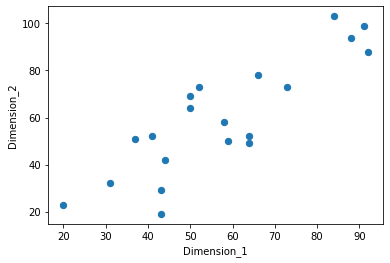

In [21]:
toy_df.plot.scatter(x='Dimension_1',y='Dimension_2',s=40)
plt.show()

In [22]:
var_df = pd.DataFrame(toy_df.var())
var_df.columns=['Variance']
var_df.reset_index(inplace=True)
var_df

,index,Variance
0,Dimension_1,415.315789
1,Dimension_2,611.673684


In [23]:
var_df = var_df.append({'index':'Total','Variance':var_df.Variance.sum()},ignore_index=True)
var_df.set_index('index')

,Variance
index,
Dimension_1,415.315789
Dimension_2,611.673684
Total,1026.989474


In [24]:
toy_df.corr()

,Dimension_1,Dimension_2
Dimension_1,1.000000,0.859195
Dimension_2,0.859195,1.000000


In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(toy_df)

toy_t_df = pd.DataFrame(pca.transform(toy_df))
toy_t_df.columns = ['PC1','PC2']
toy_t_df

,PC1,PC2
0,16.469846,-7.962674
1,1.476788,-8.418973
2,2.116506,10.009016
3,19.747457,-10.464127
4,-51.457824,1.775480
5,-19.447434,-4.653743
6,41.007198,14.194004
7,-50.214928,-6.190398
8,4.460640,11.881191
9,-45.678760,2.551638


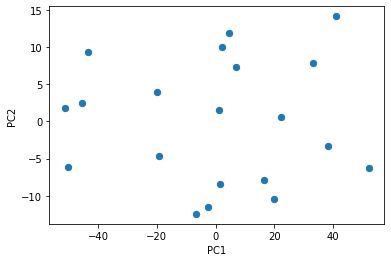

In [26]:
toy_t_df.plot.scatter(x='PC1',y='PC2',s=40)
plt.show()

In [27]:
var_df = pd.DataFrame(toy_t_df.var())
var_df.columns=['Variance']
var_df.reset_index(inplace=True)
var_df

,index,Variance
0,PC1,957.537176
1,PC2,69.452298


In [28]:
var_df = var_df.append({'index':'Total','Variance':var_df.Variance.sum()},ignore_index=True)
var_df.set_index('index')

,Variance
index,
PC1,957.537176
PC2,69.452298
Total,1026.989474


In [29]:
toy_t_df.corr()

,PC1,PC2
PC1,1.000000e+00,-2.682793e-17
PC2,-2.682793e-17,1.000000e+00


### Example – Non-parametric Dimension Reduction

In [30]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
country_df = report_df.pivot(index='Name', columns='year',
                             values=['Life_Ladder','Log_GDP_per_capita',
                                     'Social_support','Healthy_life_expectancy_at_birth',
                                     'Freedom_to_make_life_choices',
                                     'Generosity','Perceptions_of_corruption',
                                     'Positive_affect','Negative_affect'])

In [31]:
Xs = country_df
Xs = (Xs - Xs.mean())/Xs.std()
Xs

Life_Ladder                                                    \
year               2010      2011      2012      2013      2014      2015   
Name                                                                        
Afghanistan   -0.622104 -1.511427 -1.475323 -1.543065 -1.998271 -1.323126   
Albania       -0.190849  0.282957  0.020949 -0.744787 -0.576171 -0.772155   
Algeria       -0.026280 -0.202012  0.103257  0.420421  0.725942  0.323607   
Argentina      0.798253  1.084478  0.850959  0.911293  0.992956  1.073246   
Armenia       -0.951242 -1.134033 -1.010066 -0.968207 -0.881208 -1.000843   
...                 ...       ...       ...       ...       ...       ...   
Uruguay        0.478398  0.888727  0.835364  0.798768  0.900008  1.012322   
Uzbekistan    -0.337695  0.170091  0.461946  0.387805  0.467379  0.433095   
Vietnam       -0.168062  0.194781  0.042609 -0.359918 -0.347181 -0.358043   
Zambia        -0.418714 -0.482412 -0.409652 -0.179714 -0.971621 -0.563774   
Zimbabwe      -0.686244 -0.617321 -0.459903 -0.631447 -1.108508 -1.570357   

                                                     ... Negative_affect  \
year             2016      2017      2018      2019  ...            2010   
Name                                                 ...                   
Afghanistan -1.128955 -2.567462 -2.660826 -2.784707  ...        0.435211   
Albania     -0.871862 -0.824119 -0.564109 -0.543304  ...        0.768225   
Algeria     -0.138575 -0.287367 -0.528710 -0.757178  ...        0.168800   
Argentina    0.820884  0.408913  0.152042  0.390044  ...       -0.417305   
Armenia     -1.036190 -1.134360 -0.511464 -0.121544  ...        2.446616   
...               ...       ...       ...       ...  ...             ...   
Uruguay      0.594713  0.670679  0.677583  0.829769  ...       -0.150894   
Uzbekistan   0.349106  0.745595  0.526002  0.448217  ...       -1.203218   
Vietnam     -0.385065 -0.352588 -0.299070 -0.139509  ...       -0.350702   
Zambia      -1.015870 -1.447245 -1.438195 -1.987383  ...       -0.510549   
Zimbabwe    -1.557442 -1.707248 -1.823955 -2.511803  ...       -1.602835   

                                                                         \
year             2011      2012      2013      2014      2015      2016   
Name                                                                      
Afghanistan  0.251784  0.151250  0.078632  1.392257  0.846426  0.766223   
Albania      0.123794  0.188845  0.867605  0.877238  0.990833  0.452838   
Algeria      0.098196 -0.324944 -0.764963 -1.157086  0.032497  1.115768   
Argentina   -0.196182  0.201376 -0.151991 -0.371682  0.400078  0.332305   
Armenia      2.709200  2.607412  2.227067  1.765645  2.146087  1.838965   
...               ...       ...       ...       ...       ...       ...   
Uruguay      0.059799 -0.525447 -0.164129 -0.204301  0.334438 -0.017240   
Uzbekistan  -1.591277 -1.728465 -1.657110 -2.071244 -2.251756 -1.656486   
Vietnam     -0.695344 -0.437727 -1.232278 -0.333056 -0.558258 -0.740437   
Zambia      -0.554555 -0.074316  0.503464  0.774234  1.410925  1.055502   
Zimbabwe    -0.464962 -0.989110 -1.025931 -0.358807 -1.254036 -0.909183   

                                           
year             2017      2018      2019  
Name                                       
Afghanistan  1.000075  1.302003  2.385332  
Albania      0.559866  0.318447 -0.165331  
Algeria      0.024478  0.021092 -0.825371  
Argentina    0.060170  0.341320  0.338089  
Armenia      1.785312  1.873838  1.579860  
...               ...       ...       ...  
Uruguay     -0.082600 -0.184768 -0.747061  
Uzbekistan  -0.998710 -0.939591 -0.769435  
Vietnam     -0.951120 -1.145451 -1.149798  
Zambia       1.190435  0.684421  1.177123  
Zimbabwe    -0.748862 -0.905281 -0.601629  

[122 rows x 90 columns]

In [32]:
Xs.var()

                 year
Life_Ladder      2010    1.0
                 2011    1.0
                 2012    1.0
                 2013    1.0
                 2014    1.0
                        ... 
Negative_affect  2015    1.0
                 2016    1.0
                 2017    1.0
                 2018    1.0
                 2019    1.0
Length: 90, dtype: float64

In [33]:
Xs.std()

                 year
Life_Ladder      2010    1.0
                 2011    1.0
                 2012    1.0
                 2013    1.0
                 2014    1.0
                        ... 
Negative_affect  2015    1.0
                 2016    1.0
                 2017    1.0
                 2018    1.0
                 2019    1.0
Length: 90, dtype: float64

In [34]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(Xs)

Xs_t = pd.DataFrame(pca.transform(Xs),index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1,91)]

In [35]:
['PC{}'.format(i) for i in range(1,91)]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90']

In [36]:
Xs_t.var()

PC1     4.298325e+01
PC2     1.448595e+01
PC3     6.477992e+00
PC4     6.150161e+00
PC5     4.761642e+00
            ...     
PC86    3.621128e-06
PC87    5.530409e-09
PC88    1.804641e-29
PC89    1.772173e-31
PC90    1.819730e-31
Length: 90, dtype: float64

In [37]:
total_variance = Xs_t.var().sum()
dic = {'variance_percentage':Xs_t.var()/total_variance,
       'cumulative_variance_percentage':
       Xs_t.var().cumsum()/total_variance}

explanation_df = pd.DataFrame(dic)
explanation_df

,variance_percentage,cumulative_variance_percentage
PC1,4.775917e-01,0.477592
PC2,1.609550e-01,0.638547
PC3,7.197769e-02,0.710524
PC4,6.833512e-02,0.778860
PC5,5.290713e-02,0.831767
...,...,...
PC86,4.023476e-08,1.000000
PC87,6.144899e-11,1.000000
PC88,2.005157e-31,1.000000
PC89,1.969081e-33,1.000000


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

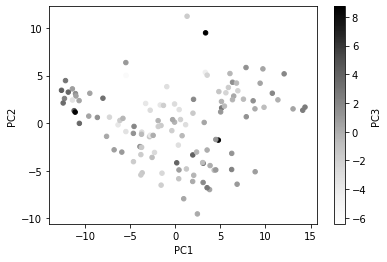

In [38]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False)

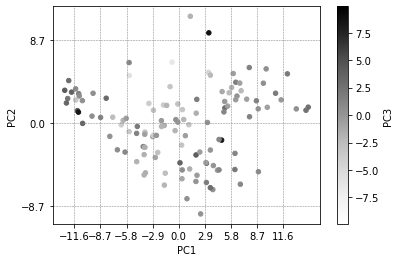

In [39]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False, 
                  vmin=-1/0.101, vmax=1/0.101)

x_ticks_vs = [-2.9*4 + 2.9*i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v,c='gray',linestyle='--',linewidth=0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7,0,8.7]
for v in y_ticks_vs:
    plt.axhline(v,c='gray',linestyle='--',linewidth=0.5)
plt.yticks(y_ticks_vs)
plt.show()

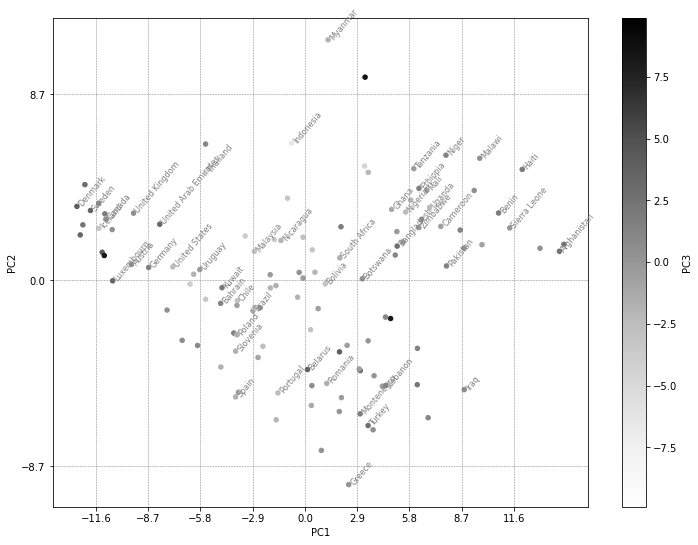

In [40]:
Xs_t.plot.scatter(x='PC1',y='PC2',c='PC3',sharex=False, 
                  vmin=-1/0.101, vmax=1/0.101,
                  figsize=(12,9))

x_ticks_vs = [-2.9*4 + 2.9*i for i in range(9)]
for v in x_ticks_vs:
    plt.axvline(v,c='gray',linestyle='--',linewidth=0.5)
plt.xticks(x_ticks_vs)

y_ticks_vs = [-8.7,0,8.7]
for v in y_ticks_vs:
    plt.axhline(v,c='gray',linestyle='--',linewidth=0.5)
plt.yticks(y_ticks_vs)

for i, row in Xs_t.sample(50).iterrows():
    plt.annotate(i, (row.PC1, row.PC2),
                 rotation=50,c='gray',size=8)
plt.show()

## Functional Data Analysis
### Example – Parametric Dimension Reduction

In [ ]:
happines_index = ['Life_Ladder','Log_GDP_per_capita','Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices','Generosity',
                  'Perceptions_of_corruption','Positive_affect',
                  'Negative_affect']

for i,row in country_df.iterrows():
    for h_i in happines_index:
        plt.plot(row[h_i])
        plt.title('{} - {}'.format(i,h_i))
        plt.show()

In [42]:
def linearFunction(t,a,b):
    y = a+ b*t
    return y

In [43]:
x_data = range(10)
y_data = country_df.loc['Afghanistan','Life_Ladder']

In [44]:
from scipy.optimize import curve_fit
p,c= curve_fit(linearFunction,
                 x_data, y_data)

In [45]:
p

array([ 4.37978182, -0.19528485])

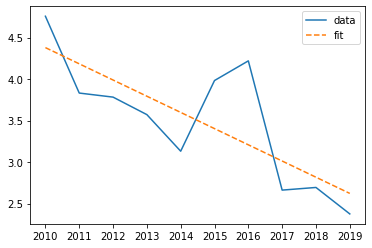

In [46]:
fit_y = linearFunction(x_data,p[0],p[1])
plt.plot(x_data,y_data,label='data' )
plt.plot(x_data, fit_y, '--', label='fit')
plt.xticks(x_data,y_data.index)
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_data,fit_y))

r2_score 0.5954935497933329


In [ ]:
happines_index = ['Life_Ladder','Log_GDP_per_capita','Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices','Generosity',
                  'Perceptions_of_corruption','Positive_affect',
                  'Negative_affect']

rSqured_df = pd.DataFrame(index=country_df.index, columns=happines_index)

for i,row in country_df.iterrows():
    for h_i in happines_index:
        x_data = range(10)
        y_data = row[h_i]
        p,c= curve_fit(linearFunction,
                 x_data, y_data)
        fit_y = linearFunction(x_data,p[0],p[1])
        
        rS = r2_score(y_data,fit_y)
        rSqured_df.at[i,h_i] = rS
        
        plt.plot(x_data,y_data,label='data' )
        plt.plot(x_data, fit_y, '--', label='fit')
        plt.xticks(x_data,y_data.index)
        plt.legend()
        plt.title('{} - {} - r2={}'
                  .format(i,h_i,str(round(rS,2))))
        plt.show()

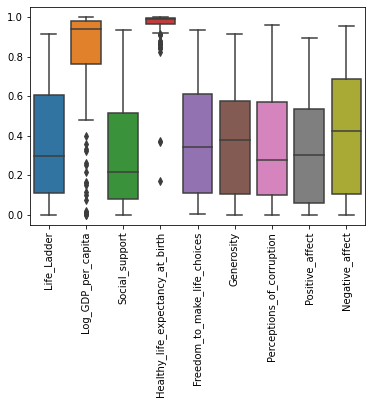

In [49]:
sns.boxplot(data=rSqured_df)
plt.xticks(rotation=90)
plt.show()

In [50]:
happines_index = ['Life_Ladder','Log_GDP_per_capita','Social_support',
                  'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices','Generosity',
                  'Perceptions_of_corruption','Positive_affect',
                  'Negative_affect']

ml_index = pd.MultiIndex.from_product(
    [happines_index,['a','b']],
    names=('Hapiness Index', 'Parameter'))

def linearFDA(row):
    
    output_sr = pd.Series(np.nan,index = ml_index)
    
    for h_i in happines_index:
        x_data = range(10)
        y_data = row[h_i]
        p,c= curve_fit(linearFunction,
                 x_data, y_data,maxfev=1000)
        output_sr.loc[(h_i,'a')] =p[0]
        output_sr.loc[(h_i,'b')] =p[1]
        
    return(output_sr)

In [51]:
country_df_t=country_df.apply(linearFDA,axis=1)

C:\Users\roy_jafari\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [52]:
country_df_t

Hapiness Index Life_Ladder           Log_GDP_per_capita            \
Parameter                a         b                  a         b   
Name                                                                
Afghanistan       4.379782 -0.195285           7.667800  0.004933   
Albania           5.336364 -0.079903           9.290091  0.026558   
Algeria           5.838145 -0.076321           9.298818  0.006985   
Argentina         6.743273 -0.076727          10.105764 -0.008570   
Armenia           4.094182  0.094382           9.147018  0.038285   
...                    ...       ...                ...       ...   
Uruguay           6.356545  0.013612           9.816382  0.021115   
Uzbekistan        5.550927  0.088394           8.460182  0.046115   
Vietnam           5.372291 -0.020909           8.525400  0.050400   
Zambia            5.312527 -0.178939           8.084345  0.010279   
Zimbabwe          5.067927 -0.220806           7.855055  0.021655   

Hapiness Index Social_support           Healthy_life_expectancy_at_birth  \
Parameter                   a         b                                a   
Name                                                                       
Afghanistan          0.539364 -0.006570                        52.072727   
Albania              0.750145 -0.012321                        66.381818   
Algeria              0.820327 -0.003473                        64.465091   
Argentina            0.912618 -0.001515                        67.281818   
Armenia              0.670727  0.011594                        65.072727   
...                       ...       ...                              ...   
Uruguay              0.882527  0.004394                        68.036364   
Uzbekistan           0.934036  0.000570                        63.109091   
Vietnam              0.802727  0.005394                        66.463636   
Zambia               0.841473 -0.019594                        50.573818   
Zimbabwe             0.861455 -0.014212                        47.445455   

Hapiness Index           Freedom_to_make_life_choices           Generosity  \
Parameter              b                            a         b          a   
Name                                                                         
Afghanistan     0.099394                     0.577909 -0.021291   0.204273   
Albania         0.288485                     0.538255  0.031721  -0.176836   
Algeria         0.177091                     0.585873 -0.015461  -0.213582   
Argentina       0.188485                     0.748436  0.011436  -0.133145   
Armenia         0.219394                     0.401164  0.041164  -0.212945   
...                  ...                          ...       ...        ...   
Uruguay         0.123030                     0.856527  0.005794  -0.056818   
Uzbekistan      0.242424                     0.928618  0.006418  -0.051855   
Vietnam         0.176970                     0.838636  0.011314   0.026618   
Zambia          0.597818                     0.701673  0.015006  -0.037782   
Zimbabwe        1.072121                     0.584564  0.015297  -0.102018   

Hapiness Index           Perceptions_of_corruption           Positive_affect  \
Parameter              b                         a         b               a   
Name                                                                           
Afghanistan    -0.034661                  0.725836  0.025103        0.682600   
Albania         0.018964                  0.809873  0.012739        0.626582   
Algeria         0.013152                  0.637400  0.012267        0.580909   
Argentina      -0.008545                  0.814764  0.004097        0.855018   
Armenia         0.005455                  0.958618 -0.025782        0.504400   
...                  ...                       ...       ...             ...   
Uruguay        -0.002352                  0.533418  0.015218        0.800818   
Uzbekistan      0.041079                  0.491964 -0.000236        0.76941

### Prominent functions to use for FDA
#### Exponential Function

In [53]:
np.exp(1)

2.718281828459045

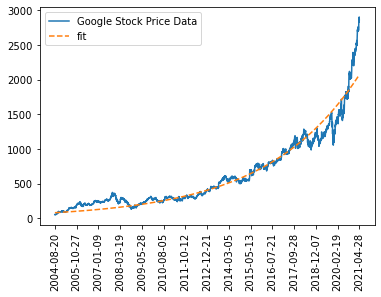

r2_score 0.9448509203130201


In [54]:
def exponantial(x,a,b):
    y = a*np.exp(b*x)
    return y

price_df = pd.read_csv('GoogleStock.csv')
price_df.set_index('t',inplace=True)

y_data = price_df.Price
x_data = range(len(y_data))

p,c= curve_fit(exponantial,
                 x_data, y_data,p0=[50,0])

fit_y = exponantial(x_data,p[0],p[1])
plt.plot(x_data,y_data,label='Google Stock Price Data')
plt.plot(x_data, fit_y, '--', label='fit')
plt.xticks(np.linspace(1,len(y_data),15),y_data.iloc[1::300].index,rotation=90)
plt.legend()
plt.show()

print("r2_score",r2_score(y_data,fit_y))

#### Fourier Function

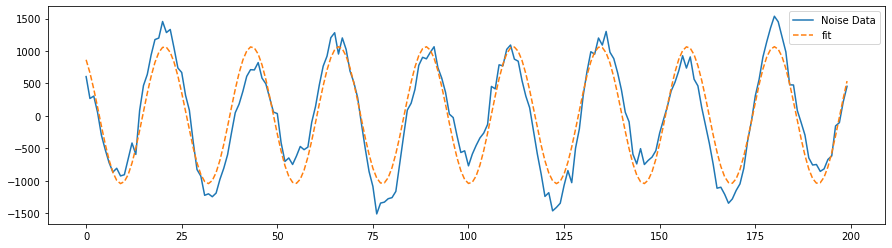

r2_score 0.8770501065480368


In [55]:
def fourier(x,a0,a1,b1,w):
    y = a0 + a1*np.cos(x*w) + b1*np.sin(x*w)
    return y

noise_df = pd.read_csv('Noise_data.csv')
noise_df.set_index('t',inplace=True)

y_data = noise_df.Signal
x_data = range(len(y_data))

p,c= curve_fit(fourier,
                 x_data, y_data,p0=[10,1000,-400,0.3])

fit_y = fourier(x_data,p[0],p[1],p[2],p[3])
plt.figure(figsize=(15,4))
plt.plot(x_data,y_data,label='Noise Data')
plt.plot(x_data, fit_y, '--', label='fit')
plt.legend()
plt.show()
print("r2_score",r2_score(y_data,fit_y))

#### Sinusoidal Function

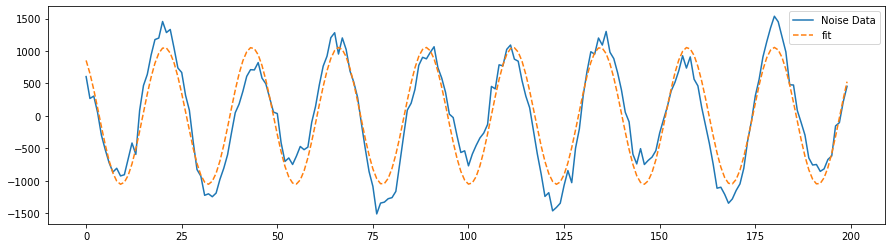

r2_score 0.8768630893287543


In [56]:
def sinusoidal(x,a1,b1,c1):
    y =  a1*np.sin(b1*x+c1)
    return y

noise_df = pd.read_csv('Noise_data.csv')
noise_df.set_index('t',inplace=True)

y_data = noise_df.Signal
x_data = range(len(y_data))

p,c= curve_fit(sinusoidal,
                 x_data, y_data,p0=[1000,0.25,2.5])

fit_y = sinusoidal(x_data,p[0],p[1],p[2])
plt.figure(figsize=(15,4))
plt.plot(x_data,y_data,label='Noise Data')
plt.plot(x_data, fit_y, '--', label='fit')
plt.legend()
plt.show()
print("r2_score",r2_score(y_data,fit_y))

#### Gaussian Function

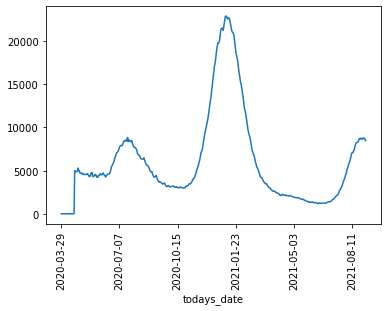

In [57]:
covid_county_day_df = pd.read_csv('covid19hospitalbycounty.csv')
covid_day_df = covid_county_day_df.groupby('todays_date').hospitalized_covid_patients.sum()
covid_day_df.plot()
plt.xticks(rotation=90)
plt.show()

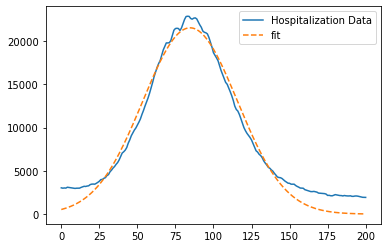

r2_score 0.9668373070226166


In [58]:
def gaussian(x,a1,b1,c1):
    y= a1*np.exp(-((x-b1)**2/2*c1**2))
    return y

y_data = covid_day_df.loc['2020-10-15':'2021-05-03']
x_data = range(len(y_data))

p,c= curve_fit(gaussian,
                 x_data, y_data)

fit_y = gaussian(x_data,p[0],p[1],p[2])
plt.plot(x_data,y_data,label='Hospitalization Data')
plt.plot(x_data, fit_y, '--', label='fit')
plt.legend()
plt.show()
print("r2_score",r2_score(y_data,fit_y))